In [48]:
# importing libraries

import torch
import torchaudio
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [49]:
DATA_DIR = "audio"
SCALE_FILE = "scale.wav"
REDHOT_FILE = "redhot.wav"
VOICE_FILE = "voice.wav"
DEBUSSY_FILE =  "debussy.wav"
DUKE_FILE = "duke.wav"

In [50]:
FRAME_SIZE = 2048
WINDOW_SIZE = FRAME_SIZE
HOP_LENGTH = 512

In [51]:
def waveform_extractor(file_path):
    waveform, sr = torchaudio.load(os.path.join(DATA_DIR,file_path))
    return waveform, sr

In [52]:
def compute_spectrogram(file_path):
    waveform, sr = waveform_extractor(file_path)
    spec = torchaudio.transforms.Spectrogram(
    n_fft = FRAME_SIZE,
    win_length=WINDOW_SIZE,
    hop_length=HOP_LENGTH)(waveform)
    return spec
    

In [56]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    fig, axs = plt.subplots(figsize= (12, 5))
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

In [57]:
def plot_spectrogram_pure_librosa(file_path):
    waveform, sr = librosa.load(os.path.join(DATA_DIR,file_path))
    stft = librosa.stft(waveform,
                       n_fft=FRAME_SIZE,
                       hop_length=HOP_LENGTH,
                       win_length=WINDOW_SIZE)
    stft_db = librosa.amplitude_to_db(abs(stft))
    
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(stft_db, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB');
    plt.title('STFT Spectrogram')
    plt.tight_layout()
    plt.show()
    

In [64]:
def plot_specgram_matplotlib(file_path, title="Spectrogram", xlim=None):
    waveform, sample_rate = torchaudio.load(os.path.join(DATA_DIR,file_path))
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(nrows = num_channels,
                                 ncols=1,
                                 figsize = (12,5))
                                  
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f'Channel {c+1}')
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)
        
      

In [59]:
def plot_spectrogram_librosa(spec):
    spec = spec.numpy()
    spec_db = librosa.amplitude_to_db(spec)
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(spec_db, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB');
    plt.title('STFT Spectrogram')
    plt.tight_layout()
    plt.show()

## Plotting Scale's spectrogram

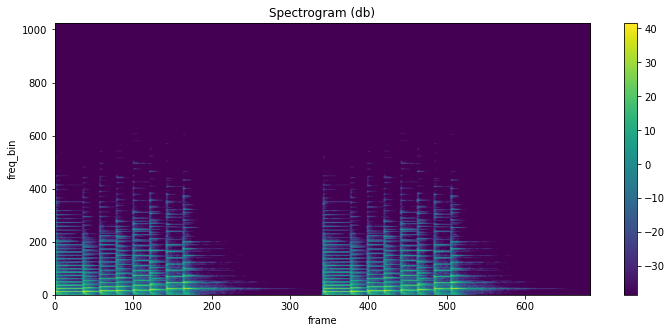

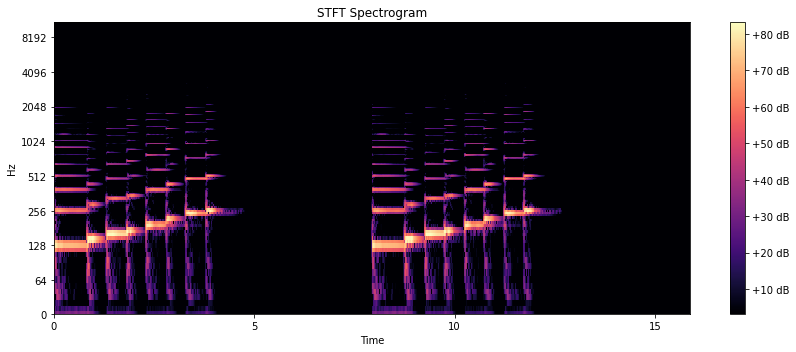

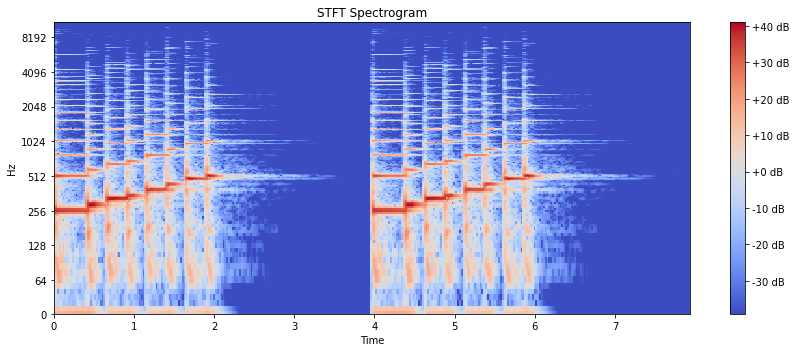

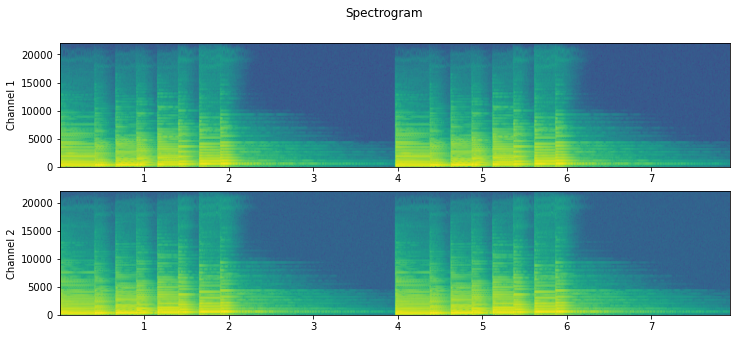

In [65]:
scale_spec = compute_spectrogram(SCALE_FILE)
plot_spectrogram(scale_spec[0])
plot_spectrogram_librosa(scale_spec[0]) # recommended 
plot_spectrogram_pure_librosa(SCALE_FILE)
plot_specgram_matplotlib(SCALE_FILE)

## Plotting Voice Files Spectrogram

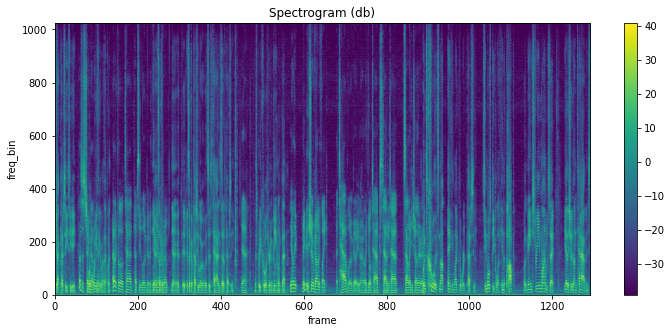

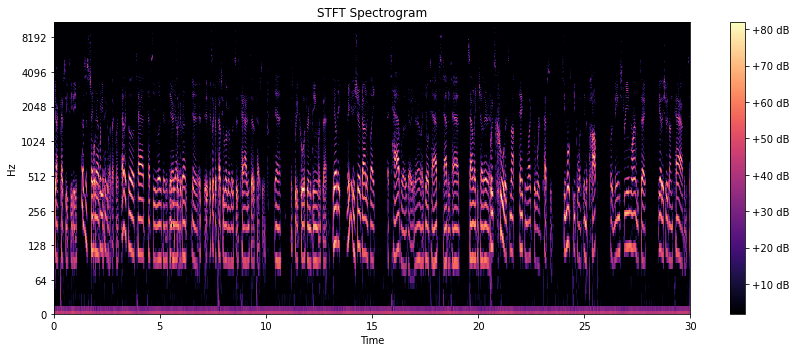

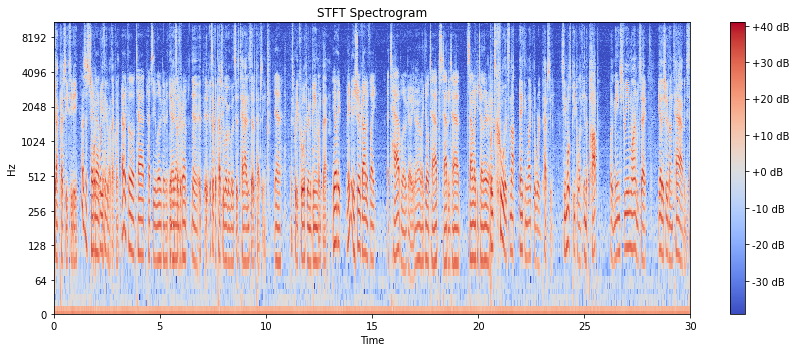

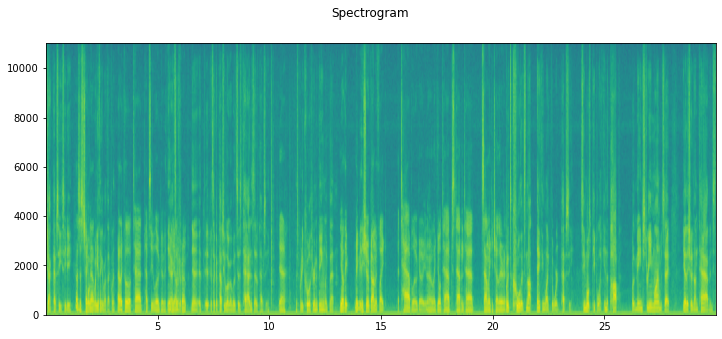

In [66]:
voice_spec = compute_spectrogram(VOICE_FILE)
plot_spectrogram(voice_spec[0])
plot_spectrogram_librosa(voice_spec[0]) # recommended 
plot_spectrogram_pure_librosa(VOICE_FILE)
plot_specgram_matplotlib(VOICE_FILE)

## Plotting DEBUSSY files Spectrogram

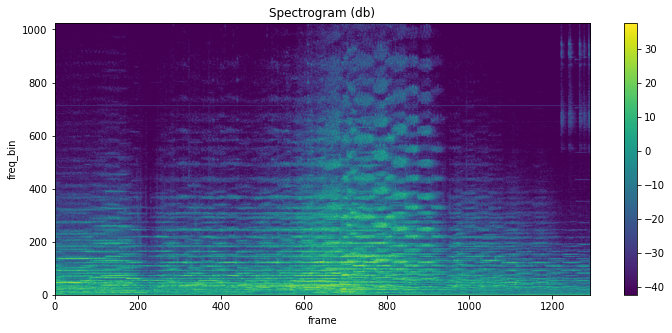

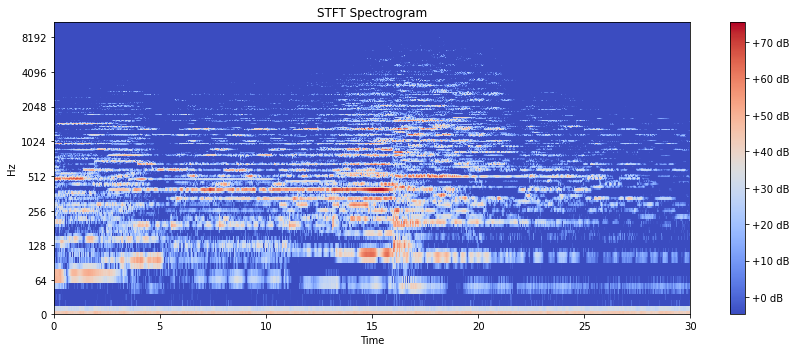

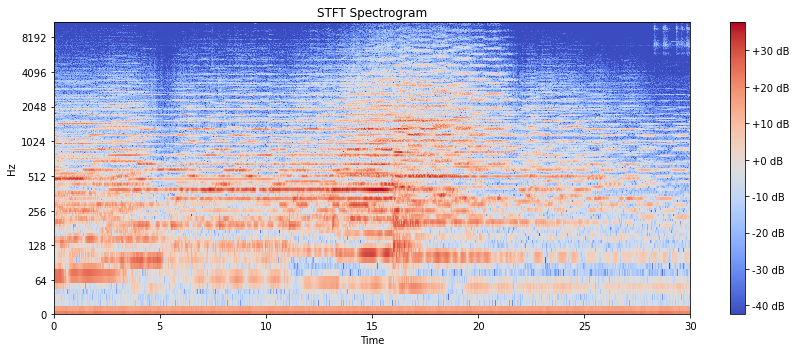

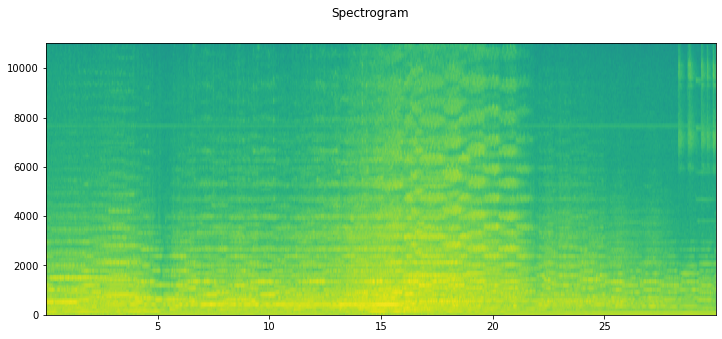

In [67]:
debussy_spec = compute_spectrogram(DEBUSSY_FILE)
plot_spectrogram(debussy_spec[0])
plot_spectrogram_librosa(debussy_spec[0]) # recommended 
plot_spectrogram_pure_librosa(DEBUSSY_FILE)
plot_specgram_matplotlib(DEBUSSY_FILE)

## PLotting DUKE file Spectrogram

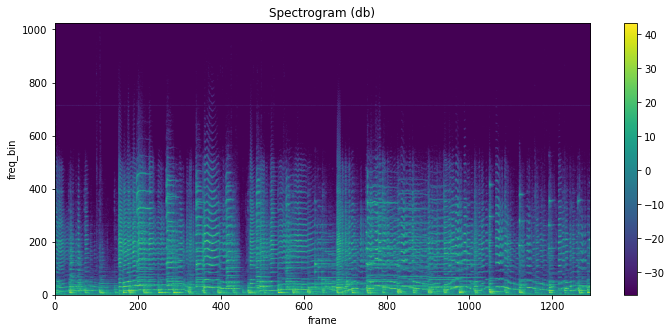

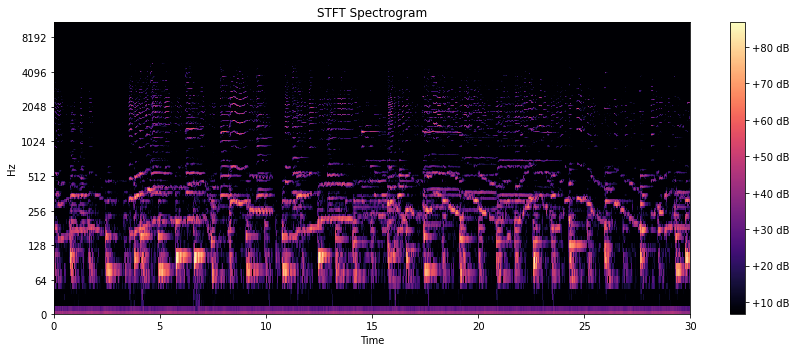

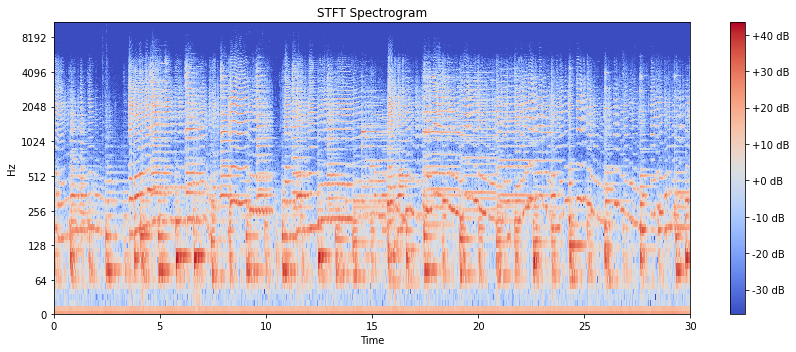

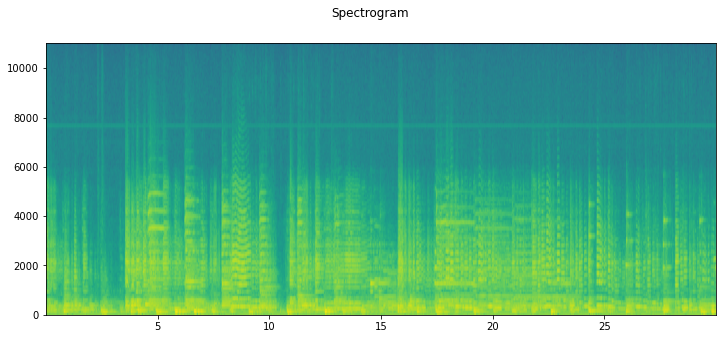

In [69]:
duke_spec = compute_spectrogram(DUKE_FILE)
plot_spectrogram(duke_spec[0])
plot_spectrogram_librosa(duke_spec[0]) # recommended 
plot_spectrogram_pure_librosa(DUKE_FILE)
plot_specgram_matplotlib(DUKE_FILE)

## Plotting REDHOT file Spectrogram

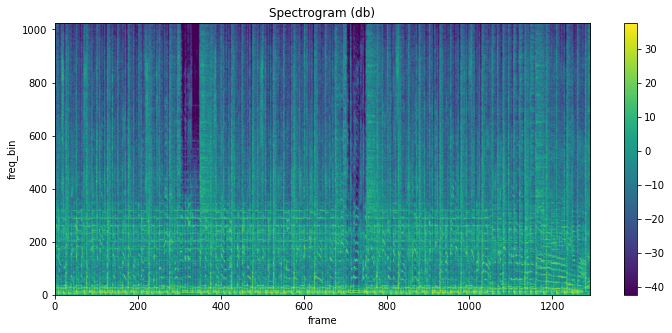

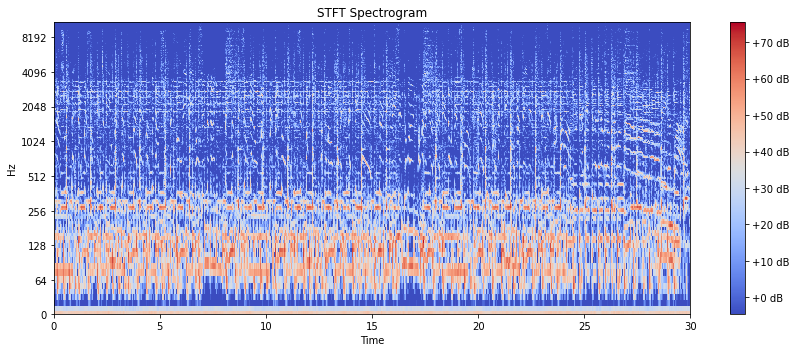

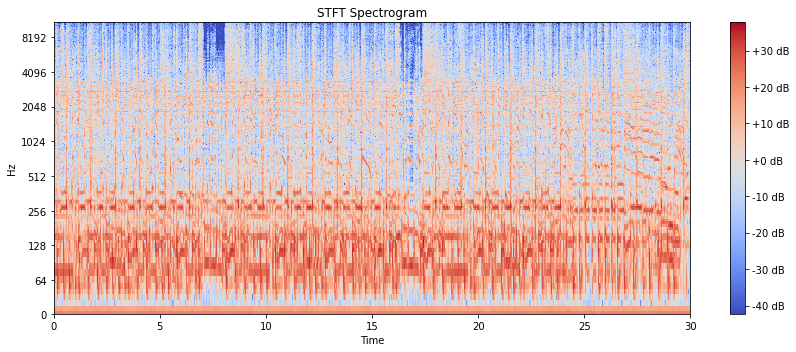

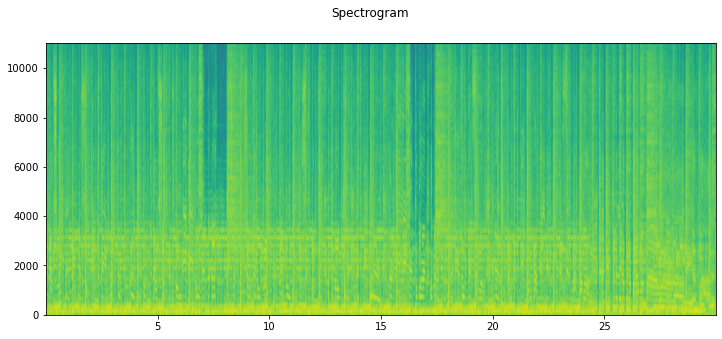

In [68]:
redhot_spec = compute_spectrogram(REDHOT_FILE)
plot_spectrogram(redhot_spec[0])
plot_spectrogram_librosa(redhot_spec[0]) # recommended 
plot_spectrogram_pure_librosa(REDHOT_FILE)
plot_specgram_matplotlib(REDHOT_FILE)